# Plot degree distribution

In this notebook, we are fetching node's degree from Neo4j and storing data in a `pandas.DataFrame`. From there, we are drawing the degree-distribution plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from neo4j import GraphDatabase

## load custom matplotlib style for nicer (IMHO) figure rendering
# comment out if you have not downloaded the file
plt.style.use('../../my_style.mplstyle')

In [2]:
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "admin"))

In [3]:
def get_degrees(tx, node_label: str, rel_type: str) -> dict[int, int]:
    query = f"""
    MATCH (n:{node_label})-[r:{rel_type}]-() 
    RETURN elementId(n) as id, count(r) as degree
    """
    result = tx.run(query)
    res = result.data()
    return res

In [4]:
with driver.session() as s:
    degree_data = s.read_transaction(get_degrees, "Person", "KNOWS")
    # degree_data = s.read_transaction(get_degrees, "Movie", "RELATED_TO")
    
print(degree_data[:3])

[{'id': '4:c8a9e0a0-fea1-4f4c-975b-d47c0d38722d:9047', 'degree': 24}, {'id': '4:c8a9e0a0-fea1-4f4c-975b-d47c0d38722d:9048', 'degree': 33}, {'id': '4:c8a9e0a0-fea1-4f4c-975b-d47c0d38722d:9049', 'degree': 11}]


In [5]:
data = pd.DataFrame(degree_data)
data

,id,degree
0,4:c8a9e0a0-fea1-4f4c-975b-d47c0d38722d:9047,24
1,4:c8a9e0a0-fea1-4f4c-975b-d47c0d38722d:9048,33
2,4:c8a9e0a0-fea1-4f4c-975b-d47c0d38722d:9049,11
3,4:c8a9e0a0-fea1-4f4c-975b-d47c0d38722d:9050,11
4,4:c8a9e0a0-fea1-4f4c-975b-d47c0d38722d:9051,8
...,...,...
40530,4:c8a9e0a0-fea1-4f4c-975b-d47c0d38722d:49989,9
40531,4:c8a9e0a0-fea1-4f4c-975b-d47c0d38722d:49990,8
40532,4:c8a9e0a0-fea1-4f4c-975b-d47c0d38722d:49991,8
40533,4:c8a9e0a0-fea1-4f4c-975b-d47c0d38722d:49992,8


In [6]:
def plot_degree_distribution(degrees: pd.Series):
    # define figure and subplots
    fig = plt.figure(figsize=(12, 8))
    ax1 = fig.subplots(1, 1)

    # compute and draw degree distribution
    distribution = degrees.value_counts().sort_index()
    distribution.plot(
        ax=ax1, 
        marker="o", color="k",
        title="Degree Distribution", xlabel="Degree", ylabel="nbOccurrences",
        logy=True, 
        logx=True,
    )

    fig.tight_layout()
    return fig

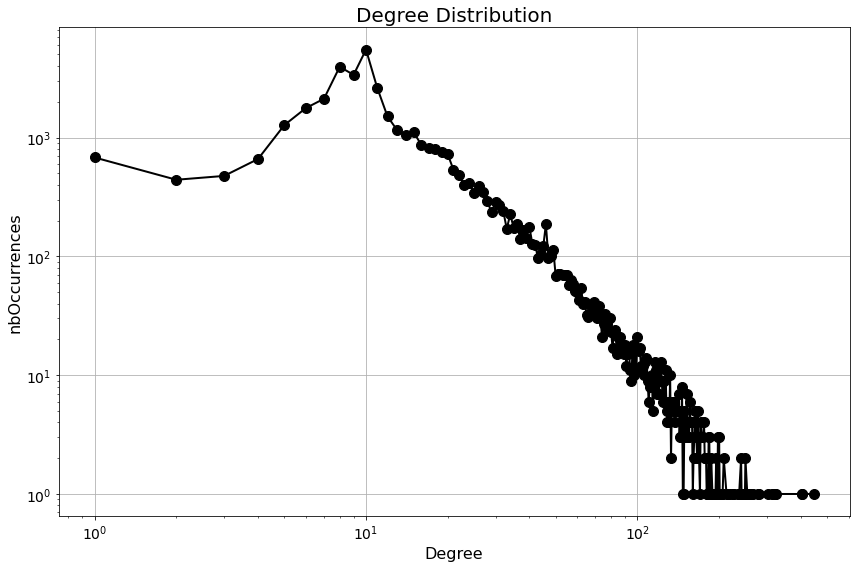

In [7]:
plot_degree_distribution(data.degree);